In [1]:
import implementations as imp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.random.random(16)
b = np.random.random(12)

In [3]:
def fast_multi(a,b):
    ''' Input 
        A: a0 a1 a2 ... a(n-2) a(m-1)
        B: b0 b1 b2 ... b(m-2) b(n-1)
        Returns:
        C: c0 c1 c2 ... c(m+n-2) c(m+n-1) which is A*B (convolution)'''
    # The below code padds a,b with required number of 0's
    m = len(a)
    n = len(b)
    l = m + n
    n_l = 2**int(np.ceil(np.log(l)/np.log(2)))
    a_p2 = np.concatenate((a, np.zeros(n_l-m)))
    b_p2 = np.concatenate((b ,np.zeros(n_l-n)))
    
    y_a = np.fft.fft(a_p2)
    y_b = np.fft.fft(b_p2)
    y_c = [y_a[i] * y_b[i] for i in range(n_l)]
    
    C = np.fft.ifft(y_c)
    return C

In [13]:
def elementry_multi(A,B):
    ''' Input 
        A: a0 a1 a2 ... a(n-2) a(m-1)
        B: b0 b1 b2 ... b(m-2) b(n-1)
        Returns:
        C: c0 c1 c2 ... c(m+n-2) c(m+n-1) which is A*B (convolution)'''
    n = len(A)
    m = len(B)
    print(m,n)
    l = m + n    #The number of values in C 
    n_l = 2**int(np.ceil(np.log(l)/np.log(2)))
    C = [0 for i in range(n_l)]
    for i in range(n):
        for j in range(m):
            C[i+j] += A[i]*B[j]
        
    return C

In [14]:
a = [np.abs(i-16)*(-1)**i for i in range(32)]
m1 = [i.real for i in fast_multi(a,a)]
m2 = elementry_multi(a,a)

32 32


In [15]:
p1 = np.poly1d(a) 
p2 = np.poly1d(a)
mul = np.polymul(p2, p1)
mul = list(mul)

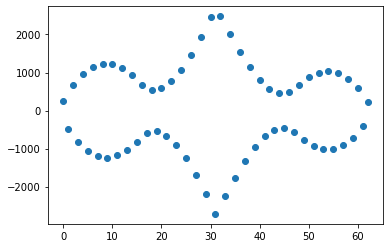

In [16]:
plt.scatter([i for i in range(len(mul))],mul)

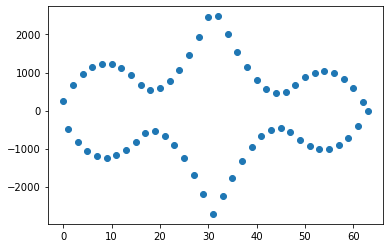

In [17]:
plt.scatter([i for i in range(len(m1))],m1)

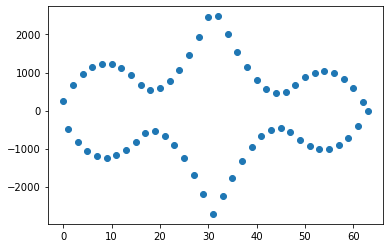

In [18]:
plt.scatter([i for i in range(len(m2))],m2)

In [22]:
def my_inv_dft(y):
    
    if bin(len(y))[2:].count('1')>1:
        raise ValueError("must be power of 2")
    else:
        N = len(y)
        y = np.array(y)
        y.reshape((N,1))
        Winv = np.array([[np.exp(2j*np.pi*i*j/N)/N for j in range(N)] for i in range(N)])
        A = np.matmul(Winv,y)
        A = A.flatten()
        return A

In [23]:
def my_inv_fft(y):
    if len(y) <= 4:
        return my_inv_dft(y)
    elif len(y)%2 != 0:
        raise ValueError("must be a power of 2")
    else:
        N = len(y)
        w = np.exp(2j*np.pi/N)
        ae = my_inv_dft(y[::2])
        ao = my_inv_dft(y[1::2])
        a = [0 for i in range(N)]
        for i in range(N//2):
            a[i] = (ae[i] + (w**i)*ao[i])/2
            a[i+N//2] = (ae[i] - (w**i)*ao[i])/2
        
        return a
        

In [24]:
np.random.seed(5)
A = np.random.random(16)
y = np.fft.fft(A)
ym = imp.fft(A)
Ac = np.fft.ifft(y)
Am = my_inv_dft(y)
Am1 = my_inv_fft(y)
Am2  = imp.inv_fft(y)

C:\Users\trsud\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


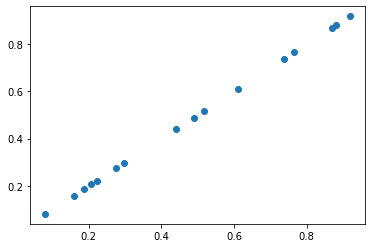

In [25]:
plt.scatter(Am1,Am)

In [26]:
a1 = fast_multi(A,A)
a2 = elementry_multi(A,A)

16 16


In [27]:
len(a1)

32

In [28]:
len(a2)

32

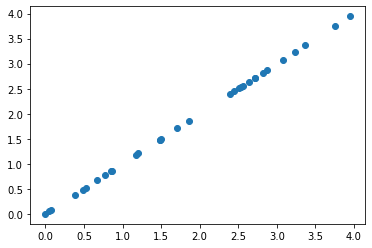

In [29]:
plt.scatter(a1,a2)

In [30]:
N = 16
w = np.exp(2j*np.pi/N)
W = [[w**(i*j) for j in range(N)] for i in range(N)]
W = np.array(W)
Winv = [[w**(-i*j) for j in range(N)] for i in range(N)]
Winv = np.array(Winv)
A = np.random.random(8)
B = np.random.random(8)
A1 = np.concatenate((A,np.zeros(8)))
B1 = np.concatenate((B,np.zeros(8)))
y_A = np.matmul(W,A1)
y_B = np.matmul(W,B1)
y_C = y_A*y_B
C = np.matmul(Winv,y_C)

In [31]:
C.real

array([ 2.17101533e+00,  2.50724821e+00,  5.07608085e+00,  1.16625785e+01,
        1.70784395e+01,  1.98087904e+01,  2.33517951e+01,  2.42176063e+01,
        1.76176579e+01,  1.32386059e+01,  1.12172780e+01,  6.82113849e+00,
        1.74518791e+00,  1.03036693e+00,  8.29965984e-01, -8.88178420e-15])

In [32]:
elementry_multi(A,B)

8 8


[0.13568845812110727,
 0.15670301342962462,
 0.31725505285134026,
 0.7289111571733807,
 1.0674024709917418,
 1.2380494027667412,
 1.4594871919447614,
 1.5136003961434623,
 1.101103619837415,
 0.8274128686516289,
 0.7010798749608274,
 0.42632115538700643,
 0.1090742441826254,
 0.06439793321340317,
 0.05187287398756846,
 0]

In [33]:
len(B)

8